In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline



## The random walk process

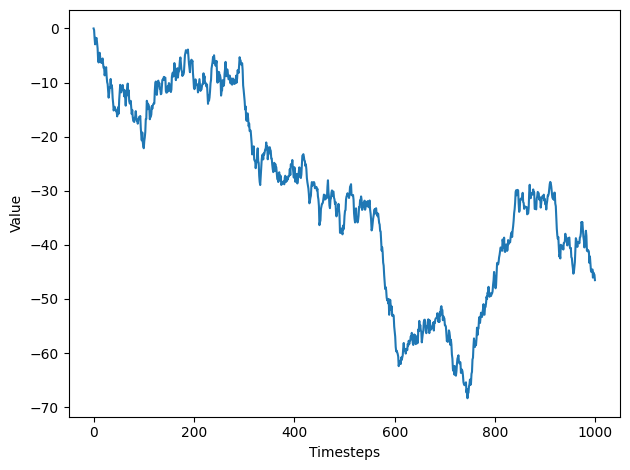

In [6]:
np.random.seed(123456)
steps = np.random.standard_normal(1000)
steps[0] = 0
random_walk = np.cumsum(steps)

fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.savefig('figures/CH03_F03.png', dpi=300)

### Testing for stationarity

In [3]:
def simulate_process(is_stationary: bool) -> np.array:
    np.random.seed(123456)
    process = np.empty(400)

    if is_stationary:
        alpha = 0.5
        process[0] = 0
    else:
        alpha = 1
        process[0] = 10
    for i in range(400):
        if i+1 < 400:
            process[i+1] = alpha*process[i] + np.random.standard_normal()
        else:
            break
    return process

In [4]:
stationary = simulate_process(True)
non_stationary = simulate_process(False)

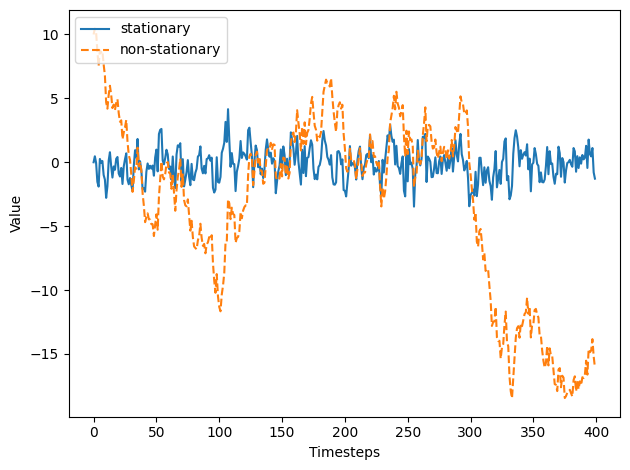

In [5]:
fig, ax = plt.subplots()

ax.plot(stationary, linestyle='-', label='stationary')
ax.plot(non_stationary, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.legend(loc=2)

plt.tight_layout()
plt.savefig('figures/CH03_F06.png', dpi=300)

In [7]:
def mean_over_time(process: np.array) -> np.array:
    mean_func = []
    for i in range(len(process)):
        mean_func.append(np.mean(process[:i]))
    return mean_func

In [8]:
stationary_mean = mean_over_time(stationary)
non_stationary_mean = mean_over_time(non_stationary)

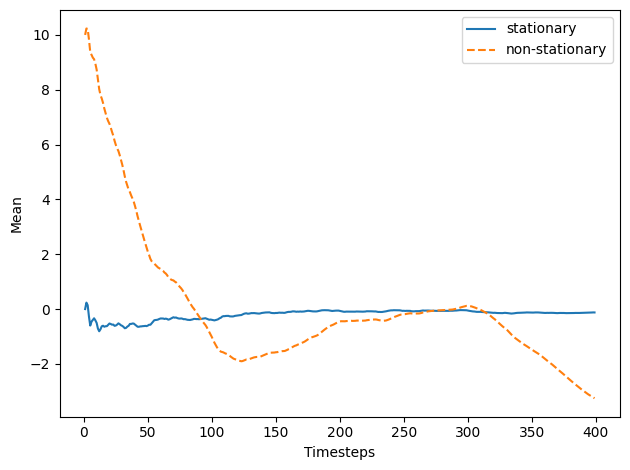

In [9]:
fig, ax = plt.subplots()

ax.plot(stationary_mean, label='stationary')
ax.plot(non_stationary_mean, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Mean')
ax.legend(loc=1)

plt.tight_layout()
plt.savefig('figures/CH03_F07.png', dpi=300)

In [10]:
def var_over_time(process: np.array) -> np.array:
    var_func = []
    
    for i in range(len(process)):
        var_func.append(np.var(process[:i]))
    
    return var_func

In [11]:

stationary_var = var_over_time(stationary)
non_stationary_var = var_over_time(non_stationary)


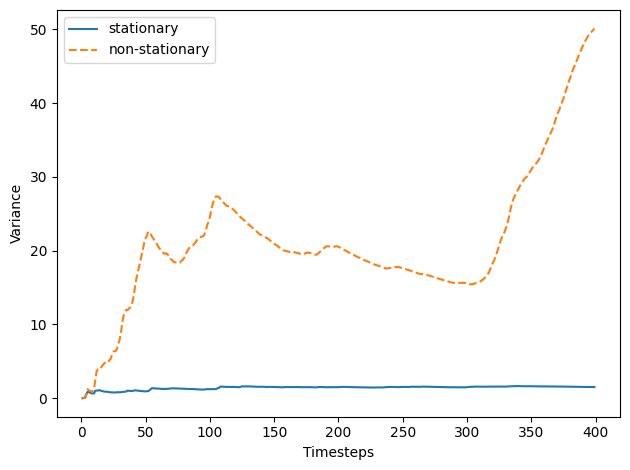

In [12]:
fig, ax = plt.subplots()

ax.plot(stationary_var, label='stationary')
ax.plot(non_stationary_var, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Variance')
ax.legend(loc=2)

plt.tight_layout()
plt.savefig('figures/CH03_F08.png', dpi=300)

### Putting it all together

ADF test for stationarity

In [14]:
ADF_result = adfuller(random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.5382101289638253
p-value: 0.514531835395351


ACF plot

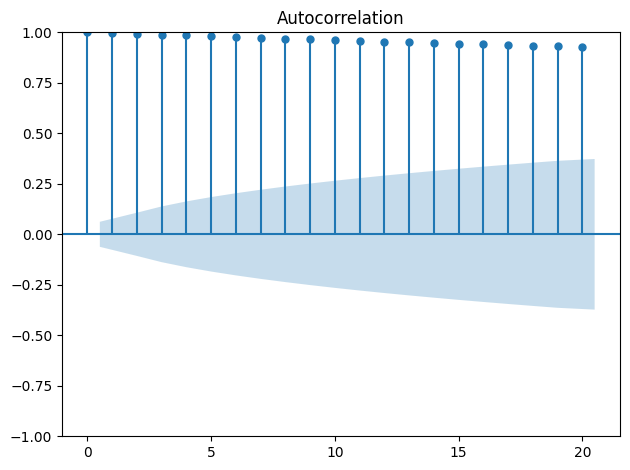

In [15]:
plot_acf(random_walk, lags=20)

plt.tight_layout()
plt.savefig('figures/CH03_F09.png', dpi=300)

First order differencing

In [16]:
diff_random_walk = np.diff(random_walk, n=1)

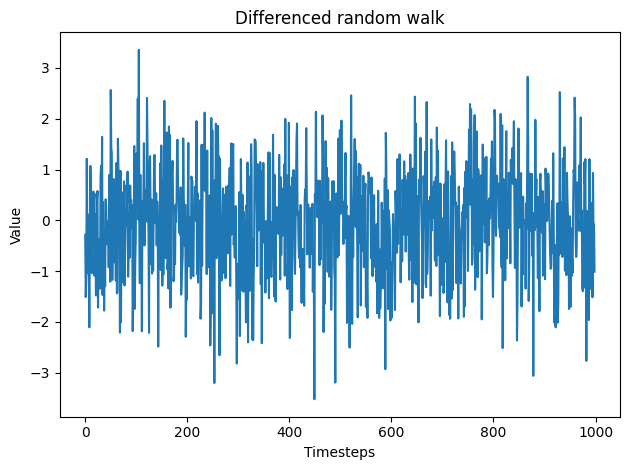

In [17]:
plt.plot(diff_random_walk)
plt.title("Differenced random walk")
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.tight_layout()

plt.savefig('figures/CH03_F10.png', dpi=300)

In [24]:
ADF_result = adfuller(diff_random_walk)

print(f'ADF Statistic: {ADF_result[0]:.4f}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -20.3389
p-value: 0.0


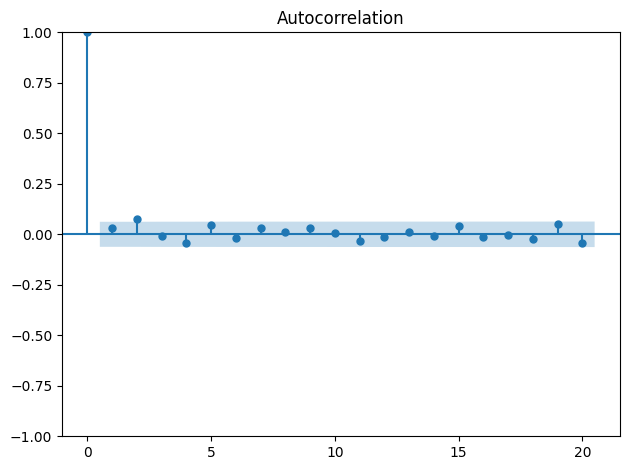

In [25]:
plot_acf(diff_random_walk, lags=20)
plt.tight_layout()
plt.savefig('figures/CH03_F11.png', dpi=300)

## Is GOOGLEL a random walk 

In [ ]:

df = pd.read_csv('./data/GOOGL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


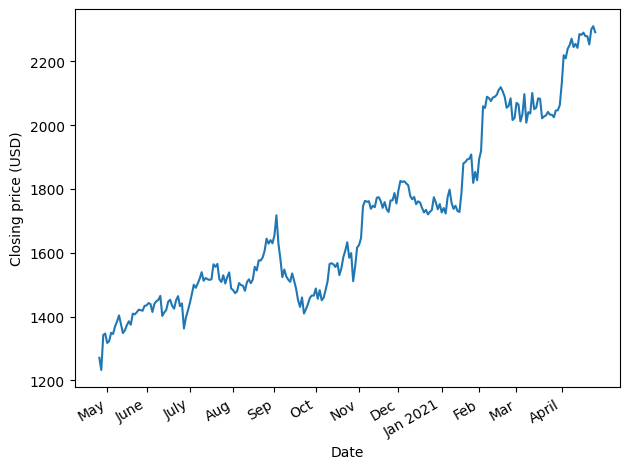

In [28]:
fig, ax = plt.subplots()

ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

plt.xticks(
    [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235], 
    ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2021', 'Feb', 'Mar', 'April'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH03_F01.png', dpi=300)

In [29]:

GOOGL_ADF_result = adfuller(df['Close'])

print(f'ADF Statistic: {GOOGL_ADF_result[0]}')
print(f'p-value: {GOOGL_ADF_result[1]}')


ADF Statistic: 0.16025048664771302
p-value: 0.9699419435913057


In [30]:
diff_close = np.diff(df['Close'], n=1)

In [31]:
GOOGL_diff_ADF_result = adfuller(diff_close)

print(f'ADF Statistic: {GOOGL_diff_ADF_result[0]}')
print(f'p-value: {GOOGL_diff_ADF_result[1]}')

ADF Statistic: -5.303439704295234
p-value: 5.3865309614545585e-06


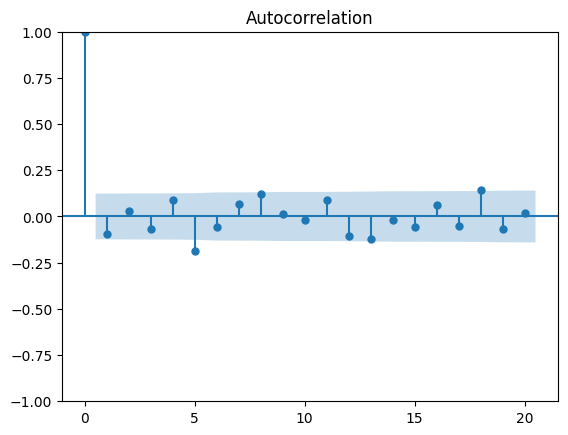

In [32]:

plot_acf(diff_close, lags=20);

plt.savefig('figures/CH03_F13.png', dpi=300)


## Forecasting a random walk

### Forecasting on a long horizon

Uses naive methods